In [2]:
#Import All Module

import dash
from dash import html, dcc
#import dash_html_components as html
#import dash_core_components as dcc
import dash_bootstrap_components as dbc
#from dash_bootstrap_component import dbc
from flask import Flask
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [26]:
#Initiate the App
server = Flask(__name__)
app = dash.Dash(__name__, server=server, external_stylesheets=[dbc.themes.BOOTSTRAP]) 
#app = dash.Dash(__name__)

In [4]:
# Read the file
df = pd.read_csv('count.csv')
df1 =pd.read_csv('data.csv')

In [5]:
#df

In [6]:
df.columns

Index(['Time', ' Bus', ' Car'], dtype='object')

In [7]:
#df1

In [31]:
# Build the component
Header_component = html.H1('Trafic Analysis Dashboard', style = {'color': 'darkcyan', 'font-size':'32px', 'textAlign' : 'center'})

In [115]:
# Visual component
# Component1
countfig = go.FigureWidget()

countfig.add_scatter(name = "Bus", x = df["Time"], y = df[' Bus'], fill = "tonexty", line_shape = 'spline')
countfig.add_scatter(name = "Car", x = df["Time"], y = df[' Car'], fill = "tonexty",line_shape = 'spline')
countfig.update_layout(title = "Vechicle Time Line", title_x = 0.5, title_font_color="red",title_font_family="Arial", title_font_size=22)


FigureWidget({
    'data': [{'fill': 'tonexty',
              'line': {'shape': 'spline'},
              'name…

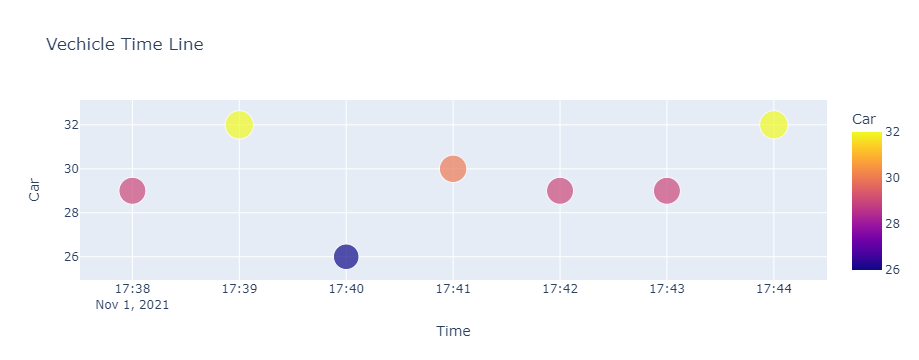

In [122]:
fig = px.scatter(df1, x="Time", y = ' Car', title = 'Vechicle Time Line',size=" Car", color=" Car", hover_name=" Car"
                 )
fig.show()

In [107]:
#Component2
countfig_cum = go.FigureWidget()

countfig_cum.add_scatter(name = "Bus", x = df["Time"], y = df[' Bus'].cumsum(), fill = "tonexty",line_shape = 'spline')
countfig_cum.add_scatter(name = "Car", x = df["Time"], y = df[' Car'].cumsum(), fill = "tonexty",line_shape = 'spline')
countfig_cum.update_layout(title = "Cumulative Trafic",title_x = 0.5, title_font_color="blue")

FigureWidget({
    'data': [{'fill': 'tonexty',
              'line': {'shape': 'spline'},
              'name…

In [99]:
# Component 3
indicator = go.FigureWidget(
    go.Indicator(
        mode = "gauge+number",
        value = df1[' Car'].mean(),
        title = {'text' : 'Speed km/h'},
        gauge = {'bar':{'color':'cyan'}}
    )
)
indicator.update_layout(title = "Average Car Speed",title_x = 0.5, title_font_color="green")
        
        
        

FigureWidget({
    'data': [{'gauge': {'bar': {'color': 'cyan'}},
              'mode': 'gauge+number',
      …

In [100]:
# Component 3
indicator1 = go.FigureWidget(
    go.Indicator(
        mode = "gauge+number",
        value = df1[' Bus'].mean(),
        title = {'text' : 'Speed km/h'},
        gauge = {'bar':{'color':'red'}}
    )
)
indicator1.update_layout(title = "Average Bus Speed", title_x = 0.5, title_font_color="blue")

FigureWidget({
    'data': [{'gauge': {'bar': {'color': 'red'}},
              'mode': 'gauge+number',
       …

In [103]:
# Component 5
piefig = go.FigureWidget(
    px.pie(
        labels = ["Bus", "Car"],
        values = [df[' Car'].sum(), df[' Bus'].sum()],
        hole = 0.5
    )
)
piefig.update_layout(title = 'Trafic Distribution',title_x = 0.5, title_font_color="orange")

FigureWidget({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hole': 0.5,
        …

In [104]:
# Desaign the app layout
app.layout = html.Div([
        dbc.Row(
            [dbc.Col([
            Header_component
        ])]),
        dbc.Row(
            [dbc.Col(
                [dcc.Graph(figure = countfig)],width=6
            ),
            dbc.Col(
                [dcc.Graph(figure = countfig_cum)], width=6
            )]
        ),
        dbc.Row(
            [dbc.Col(
                [dcc.Graph(figure = indicator)]
            ),
            dbc.Col(
                [dcc.Graph(figure = indicator1)]
            ),
            dbc.Col(
                [dcc.Graph(figure = piefig)]
             )]
        ),
    ]
)


In [105]:
# Run the app
app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Aug/2022 19:25:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Aug/2022 19:25:07] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/Aug/2022 19:25:07] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/Aug/2022 19:25:07] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Aug/2022 19:25:07] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
